# Modeling with Data in the Tidyverse
<img src="img/0.0.png" align="left">

#### Description
**In this course, you will learn to model with data. Models attempt to capture the relationship between an outcome variable of interest and a series of explanatory/predictor variables. Such models can be used for both explanatory purposes, e.g. "Does knowing professors' ages help explain their teaching evaluation scores?", and predictive purposes, e.g., "How well can we predict a house's price based on its size and condition?" You will leverage your tidyverse skills to construct and interpret such models. This course centers around the use of linear regression, one of the most commonly-used and easy to understand approaches to modeling. Such modeling and thinking is used in a wide variety of fields, including statistics, causal inference, machine learning, and artificial intelligence.**

# 1 - Introduction to Modeling
**This chapter will introduce you to some background theory and terminology for modeling, in particular, the general modeling framework, the difference between modeling for explanation and modeling for prediction, and the modeling problem. Furthermore, you'll start performing your first exploratory data analysis, a crucial first step before any formal modeling.**

## 1.2 - Exploratory visualization of age
<img src="img/1.2.png" align="left">

In [ ]:
# Install Packages
!install.packages("moderndive")

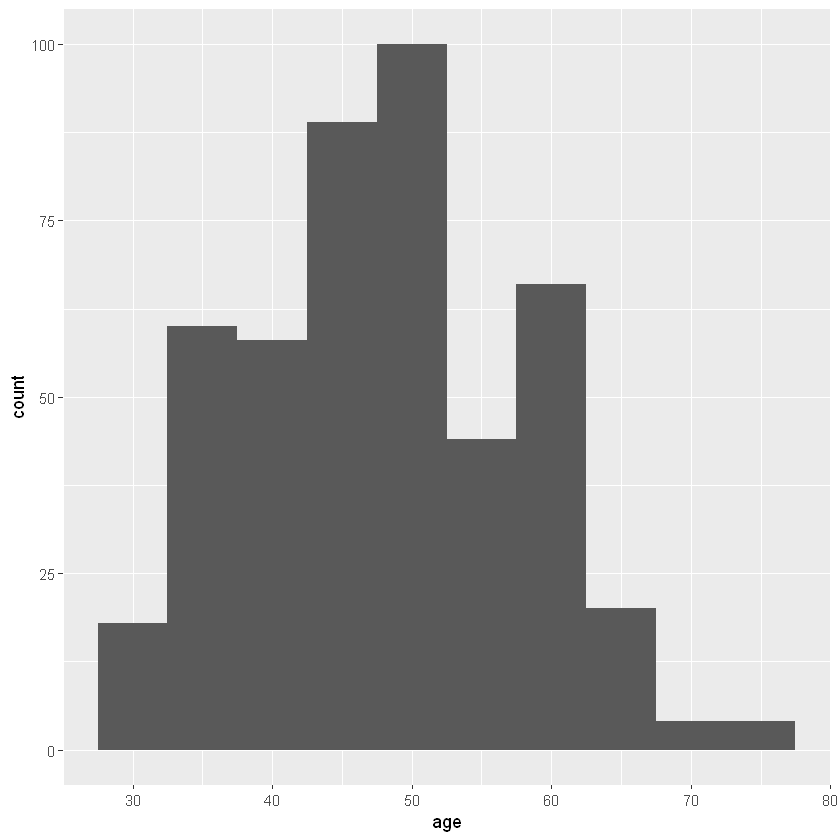

In [4]:
# Load packages
library(moderndive)
library(ggplot2)

# Plot the histogram
ggplot(evals, aes(x = age)) +
  geom_histogram(binwidth = 5) +
  labs(x = "age", y = "count")

## 1.3 - Numerical summaries of age
<img src="img/1.3.png" align="left">

In [ ]:
# Load packages
library(moderndive)
library(dplyr)

# Compute summary stats
evals %>%
  summarize(mean_age = mean(age),
            median_age = median(age),
            sd_age = sd(age))

## 1.4 - Video - Background on modeling for prediction
<div align="left">
<video width="80%" controls>
<source src="vid\1.4.mp4" type="video/mp4"> 
</video>
</div>

## 1.5 - Exploratory visualization of house size
<img src="img/1.5.png" align="left">

In [ ]:
#1
# Load packages
library(moderndive)
library(ggplot2)

# Plot the histogram
ggplot(house_prices, aes(x = sqft_living)) +
  geom_histogram() +
  labs(x = "Size (sq.feet)", y = "count")


#2 Quiz

## 1.6 - Log10 transformation of house size
<img src="img/1.6.png" align="left">

In [ ]:
#1
# Load packages
library(moderndive)
library(dplyr)
library(ggplot2)

# Add log10_size
house_prices_2 <- house_prices %>%
  mutate(log10_size = log10(sqft_living))

#2
# Load packages
library(moderndive)
library(dplyr)
library(ggplot2)

# Add log10_size
house_prices_2 <- house_prices %>%
  mutate(log10_size = log10(sqft_living))

# Plot the histogram  
ggplot(house_prices_2, aes(x = log10_size)) +
  geom_histogram() +
  labs(x = "log10 size", y = "count")

## 1.7 - Video - The modeling problem for explanation
<div align="left">
<video width="80%" controls>
<source src="vid\1.7.mp4" type="video/mp4"> 
</video>
</div>

## 1.8 - EDA of relationship of teaching & "beauty" scores
<img src="img/1.8.png" align="left">

In [ ]:
#1
# Plot the histogram
ggplot(evals, aes(x = bty_avg)) +
  geom_histogram(binwidth = 0.5) +
  labs(x = "Beauty score", y = "count")
  
  
#2
# Scatterplot
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_point() +
  labs(x = "beauty score", y = "teaching score")
  

#3
# Jitter plot
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  labs(x = "beauty score", y = "teaching score")

## 1.9 - Correlation between teaching and "beauty" scores
<img src="img/1.9.png" align="left">

In [ ]:
#1
# Compute correlation
evals %>%
  summarize(correlation = cor(score, bty_avg))
  
#2 Quiz

## 1.10 - Video - The modeling problem for prediction
<div align="left">
<video width="80%" controls>
<source src="vid\1.10.mp4" type="video/mp4"> 
</video>
</div>

## 1.11 - EDA of relationship of house price and waterfront
<img src="img/1.11.png" align="left">

In [ ]:
#1 
# View the structure of log10_price and waterfront
house_prices %>%
  select(log10_price, waterfront) %>%
  glimpse()


#2
# View the structure of log10_price and waterfront
house_prices %>%
  select(log10_price, waterfront) %>%
  glimpse()

# Plot
ggplot(house_prices, aes(x = waterfront, y = log10_price)) +
  geom_boxplot() +
  labs(x = "waterfront", y = "log10 price")

## 1.12 - Predicting house price with waterfront
<img src="img/1.12.png" align="left">

In [ ]:
#1
# Calculate stats
house_prices %>%
  group_by(waterfront) %>%
  summarize(mean_log10_price = mean(log10_price), n = n())

#2
# Calculate stats
house_prices %>%
  group_by(waterfront) %>%
  summarize(mean_log10_price = mean(log10_price), n = n())
  
# Prediction of price for houses without view of waterfront
10^(5.66)

# Prediction of price for houses with view of waterfront
10^(6.12)

# 2 - Modeling with Basic Regression
**Equipped with your understanding of the general modeling framework, in this chapter, we'll cover basic linear regression where you'll keep things simple and model the outcome variable y as a function of a single explanatory/ predictor variable x. We'll use both numerical and categorical x variables. The outcome variable of interest in this chapter will be teaching evaluation scores of instructors at the University of Texas, Austin.**

## 2.1 - Video - Explaining teaching score with age
<div align="left">
<video width="80%" controls>
<source src="vid\2.1.mp4" type="video/mp4"> 
</video>
</div>

## 2.2 - Plotting a "best-fitting" regression line
<img src="img/2.2.png" align="left">

In [ ]:
# Load packages
library(ggplot2)
library(dplyr)
library(moderndive)

# Plot
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_point() +
  labs(x = "beauty score", y = "score") +
  geom_smooth(method = "lm", se = FALSE)

## 2.3 - Fitting a regression with a numerical x
<img src="img/2.3.png" align="left">

In [ ]:
#1
# Load package
library(moderndive)

# Fit model
model_score_2 <- lm(score ~ bty_avg, data = evals)

# Output content
model_score_2

#2
# Load package
library(moderndive)

# Fit model
model_score_2 <- lm(score ~ bty_avg, data = evals)

# Output regression table
get_regression_table(model_score_2)

#3
Quiz

## 2.4 - Video - Predicting teaching score using age
<div align="left">
<video width="80%" controls>
<source src="vid\2.4.mp4" type="video/mp4"> 
</video>
</div>

## 2.5 - Making predictions using "beauty score"
<img src="img/2.5.png" align="left">

In [ ]:
#1
# Use fitted intercept and slope to get a prediction
y_hat <- 3.88 + 5 * 0.0670
y_hat


#2
# Use fitted intercept and slope to get a prediction
y_hat <- 3.88 + 5 * 0.0670
y_hat

# Compute residual y - y_hat
4.7 - 4.215

## 2.6 - Computing fitted/predicted values & residuals
<img src="img/2.6.png" align="left">

In [ ]:
#1
# Fit regression model
model_score_2 <- lm(score ~ bty_avg, data = evals)

# Get regression table
get_regression_table(model_score_2)

# Get all fitted/predicted values and residuals
get_regression_points(model_score_2)


#2
# Fit regression model
model_score_2 <- lm(score ~ bty_avg, data = evals)

# Get regression table
get_regression_table(model_score_2)

# Get all fitted/predicted values and residuals
get_regression_points(model_score_2) %>% 
  mutate(score_hat_2 = 3.88 + 0.067 * bty_avg)


#3
# Fit regression model
model_score_2 <- lm(score ~ bty_avg, data = evals)

# Get regression table
get_regression_table(model_score_2)

# Get all fitted/predicted values and residuals
get_regression_points(model_score_2) %>% 
  mutate(residual_2 = score - score_hat)

## 2.7 - Video - Explaining teaching score with gender
<div align="left">
<video width="80%" controls>
<source src="vid\2.7.mp4" type="video/mp4"> 
</video>
</div>

## 2.8 - EDA of relationship of score and rank
<img src="img/2.8.png" align="left">

In [ ]:
#1
ggplot(evals, aes(x = rank, y = score)) +
  geom_boxplot() +
  labs(x = "rank", y = "score")


#2
evals %>%
  group_by(rank) %>%
  summarize(n = n(), mean_score = mean(score), sd_score = sd(score))

## 2.9 - Fitting a regression with a categorical x
<img src="img/2.9.png" align="left">

In [ ]:
#1
# Fit regression model
model_score_4 <- lm(score ~ rank, data = evals)

# Get regression table
get_regression_table(model_score_4)


#2
# Fit regression model
model_score_4 <- lm(score ~ rank, data = evals)

# Get regression table
get_regression_table(model_score_4)

# teaching mean
teaching_mean <- 4.28

# tenure track mean
tenure_track_mean <- 4.28 - 0.130

# tenured mean
tenured_mean <- 4.28 - 0.145

## 2.10 - Video - Predicting teaching score using gender
<div align="left">
<video width="80%" controls>
<source src="vid\2.10.mp4" type="video/mp4"> 
</video>
</div>

## 2.11 - Making predictions using rank
<img src="img/2.11.png" align="left">

## 2.12 - Visualizing the distribution of residuals
<img src="img/2.12.png" align="left">

In [ ]:
#1 
# Calculate predictions and residuals
model_score_4_points <- get_regression_points(model_score_4)
model_score_4_points


#2
# Calculate predictions and residuals
model_score_4_points <- get_regression_points(model_score_4)
model_score_4_points

# Plot residuals
ggplot(model_score_4_points, aes(x = residual)) +
  geom_histogram() +
  labs(x = "residuals", title = "Residuals from score ~ rank model")

# 3 - Modeling with Multiple Regression
**In the previous chapter, you learned about basic regression using either a single numerical or a categorical predictor. But why limit ourselves to using only one variable to inform your explanations/predictions? You will now extend basic regression to multiple regression, which allows for incorporation of more than one explanatory or one predictor variable in your models. You'll be modeling house prices using a dataset of houses in the Seattle, WA metropolitan area.**

## 3.1 - Video - Explaining house price with year & size
<div align="left">
<video width="80%" controls>
<source src="vid\3.1.mp4" type="video/mp4"> 
</video>
</div>

## 3.2 - EDA of relationship
<img src="img/3.2.png" align="left">

In [ ]:
#1
# Create scatterplot with regression line
ggplot(house_prices, aes(x = bedrooms, y = log10_price)) +
  geom_point() +
  labs(x = "Number of bedrooms", y = "log10 price") +
  geom_smooth(method = "lm", se = FALSE)


#2
# Remove outlier
house_prices_transform <- house_prices %>% 
  filter(bedrooms < 33)

# Create scatterplot with regression line
ggplot(house_prices_transform, aes(x = bedrooms, y = log10_price)) +
  geom_point() +
  labs(x = "Number of bedrooms", y = "log10 price") +
  geom_smooth(method = "lm", se = FALSE)

## 3.3 - Fitting a regression
<img src="img/3.3.png" align="left">

In [ ]:
#1
# Fit model
model_price_2 <- lm(log10_price ~ log10_size + bedrooms, 
                    data = house_prices)

# Get regression table
get_regression_table(model_price_2)



#2 Quiz


## 3.4 - Video - Predicting house price using year & size
<div align="left">
<video width="80%" controls>
<source src="vid\3.4.mp4" type="video/mp4"> 
</video>
</div>

## 3.5 - Making predictions using size and bedrooms
<img src="img/3.5.png" align="left">

In [ ]:
#1 
# Make prediction in log10 dollars
2.69 + 0.941 * log10(1000) - 0.033 * 3


#2
# Make prediction in log10 dollars
2.69 + 0.941 * log10(1000) - 0.033 * 3

# Make prediction dollars
10^(2.69 + 0.941 * log10(1000) - 0.033 * 3)

## 3.6 - Interpreting residuals
<img src="img/3.6.png" align="left">

In [ ]:
#1
# Automate prediction and residual computation
get_regression_points(model_price_2)


#2
# Automate prediction and residual computation
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(sum_sq_residuals = sum(sq_residuals))


#3 Quiz

## 3.7 - Video - Explaining house price with size & condition
<div align="left">
<video width="80%" controls>
<source src="vid\3.7.mp4" type="video/mp4"> 
</video>
</div>

## 3.8 - Parallel slopes model
<img src="img/3.8.png" align="left">

In [ ]:
# Fit model
model_price_4 <- lm(log10_price ~ log10_size + waterfront,
                    data = house_prices)

# Get regression table
get_regression_table(model_price_4)

## 3.9 - Interpreting the parallel slopes model
<img src="img/3.9.png" align="left">

## 3.10 - Video - Predicting house price using size & condition
<div align="left">
<video width="80%" controls>
<source src="vid\3.10.mp4" type="video/mp4"> 
</video>
</div>

## 3.11 - Making predictions using size and waterfront
<img src="img/3.11.png" align="left">

In [ ]:
# Get regression table
get_regression_table(model_price_4)

# Prediction for House A
10^(2.96 + 0.825 * 2.9 + 0.322)

# Prediction for House B
10^(2.96 + 0.825 * 3.1)




## 3.12 - Automating predictions on "new" houses
<img src="img/3.12.png" align="left">

In [ ]:
#1
#2
# View the "new" houses
new_houses_2

# Get predictions on "new" houses
get_regression_points(model_price_4, newdata = new_houses_2)


#2
# View the "new" houses
new_houses_2

# Get predictions price_hat in dollars on "new" houses
get_regression_points(model_price_4, newdata = new_houses_2) %>% 
  mutate(price_hat = 10^log10_price_hat)

# 4 - Model Assessment and Selection
**In the previous chapters, you fit various models to explain or predict an outcome variable of interest. However, how do we know which models to choose? Model assessment measures allow you to assess how well an explanatory model "fits" a set of data or how accurate a predictive model is. Based on these measures, you'll learn about criteria for determining which models are "best".**

## 4.1 - Video - Model selection and assessment
<div align="left">
<video width="80%" controls>
<source src="vid\4.1.mp4" type="video/mp4"> 
</video>
</div>

## 4.2 - Refresher: sum of squared residuals
<img src="img/4.2.png" align="left">

In [ ]:
#1
# Model 2
model_price_2 <- lm(log10_price ~ log10_size + bedrooms, 
                    data = house_prices)

# Calculate squared residuals
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(sum_sq_residuals = sum(sq_residuals))


#2
# Model 4
model_price_4 <- lm(log10_price ~ log10_size + waterfront, 
                    data = house_prices)

# Calculate squared residuals
get_regression_points(model_price_4) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(sum_sq_residuals = sum(sq_residuals))

## 4.3 - Which model to select?
<img src="img/4.3.png" align="left">

## 4.4 - Video - Assessing model fit with R-squared
<div align="left">
<video width="80%" controls>
<source src="vid\4.4.mp4" type="video/mp4"> 
</video>
</div>

## 4.5 - Computing the R-squared of a model
<img src="img/4.5.png" align="left">

In [ ]:
# Fit model
model_price_2 <- lm(log10_price ~ log10_size + bedrooms,
                    data = house_prices)
                    
# Get fitted/values & residuals, compute R^2 using residuals
get_regression_points(model_price_2) %>%
  summarize(r_squared = 1 - var(residual) / var(log10_price))

## 4.6 - Comparing the R-squared of two models
<img src="img/4.6.png" align="left">

In [ ]:
#1
# Fit model
model_price_4 <- lm(log10_price ~ log10_size + waterfront,
                    data = house_prices)

# Get fitted/values & residuals, compute R^2 using residuals
get_regression_points(model_price_4) %>%
  summarize(r_squared = 1 - var(residual) / var(log10_price))


#2


## 4.7 - Video - Assessing predictions with RMSE
<div align="left">
<video width="80%" controls>
<source src="vid\4.7.mp4" type="video/mp4"> 
</video>
</div>

## 4.8 - Computing the MSE & RMSE of a model
<img src="img/4.8.png" align="left">

In [ ]:
#1
# Get all residuals, square them, and take mean                    
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(mse = mean(sq_residuals))


#2
# Get all residuals, square them, take the mean and square root               
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(mse = mean(sq_residuals)) %>%
  mutate(rmse = sqrt(mse))

## 4.9 - Comparing the RMSE of two models
<img src="img/4.9.png" align="left">

In [ ]:
#1
# MSE and RMSE for model_price_2
get_regression_points(model_price_2) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(mse = mean(sq_residuals), rmse = sqrt(mean(sq_residuals)))

# MSE and RMSE for model_price_4
get_regression_points(model_price_4) %>%
  mutate(sq_residuals = residual^2) %>%
  summarize(mse = mean(sq_residuals), rmse = sqrt(mean(sq_residuals)))


#2


## 4.10 - Video - Validation set prediction framework
<div align="left">
<video width="80%" controls>
<source src="vid\4.10.mp4" type="video/mp4"> 
</video>
</div>

## 4.11 - Fitting model to training data
<img src="img/4.11.png" align="left">

In [ ]:
#1
# Set random number generator seed value for reproducibility
set.seed(76)

# Randomly reorder the rows
house_prices_shuffled <- house_prices %>% 
  sample_frac(size = 1, replace = FALSE)

# Train/test split
train <- house_prices_shuffled %>%
  slice(1:10000)
test <- house_prices_shuffled %>%
  slice(10001:21613)


#2
# Set random number generator seed value for reproducibility
set.seed(76)

# Randomly reorder the rows
house_prices_shuffled <- house_prices %>% 
  sample_frac(size = 1, replace = FALSE)

# Train/test split
train <- house_prices_shuffled %>%
  slice(1:10000)
test <- house_prices_shuffled %>%
  slice(10001:21613)

# Fit model to training set
train_model_2 <- lm(log10_price ~ log10_size + bedrooms, data = train)

## 4.12 - Predicting on test data
<img src="img/4.12.png" align="left">

In [ ]:
#1
# Make predictions on test set
get_regression_points(train_model_2, newdata = test)


#2
# Make predictions on test set
get_regression_points(train_model_2, newdata = test)

# Compute RMSE
get_regression_points(train_model_2, newdata = test) %>% 
  mutate(sq_residuals = residual^2) %>%
  summarize(rmse = sqrt(mean(sq_residuals)))

## 4.13 - Video - Conclusion - Where to go from here?
<div align="left">
<video width="80%" controls>
<source src="vid\4.13.mp4" type="video/mp4"> 
</video>
</div>